<a href="https://colab.research.google.com/github/damianlicheri/Proyecto-Final/blob/main/Copia_de_Tesis(modelo_entrenado).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install openmeteo-requests


In [ ]:
pip install requests_cache

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.5 MB/s eta 0:00:00


In [ ]:
pip install retry_requests

In [ ]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": -33.4569,
	"longitude": -70.6483,
	"start_date": "1973-01-01",
	"end_date": 	"2024-08-08",
	"hourly": ["temperature_2m", "relative_humidity_2m", "dew_point_2m", "apparent_temperature", "precipitation", "rain", "snowfall", "snow_depth", "weather_code", "pressure_msl", "surface_pressure", "cloud_cover", "cloud_cover_low", "cloud_cover_mid", "cloud_cover_high", "et0_fao_evapotranspiration", "vapour_pressure_deficit", "wind_speed_10m", "wind_speed_100m", "wind_direction_10m", "wind_direction_100m", "wind_gusts_10m", "soil_temperature_0_to_7cm", "soil_temperature_7_to_28cm", "soil_moisture_0_to_7cm", "soil_moisture_7_to_28cm"]
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
hourly_dew_point_2m = hourly.Variables(2).ValuesAsNumpy()
hourly_apparent_temperature = hourly.Variables(3).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(4).ValuesAsNumpy()
hourly_rain = hourly.Variables(5).ValuesAsNumpy()
hourly_snowfall = hourly.Variables(6).ValuesAsNumpy()
hourly_snow_depth = hourly.Variables(7).ValuesAsNumpy()
hourly_weather_code = hourly.Variables(8).ValuesAsNumpy()
hourly_pressure_msl = hourly.Variables(9).ValuesAsNumpy()
hourly_surface_pressure = hourly.Variables(10).ValuesAsNumpy()
hourly_cloud_cover = hourly.Variables(11).ValuesAsNumpy()
hourly_cloud_cover_low = hourly.Variables(12).ValuesAsNumpy()
hourly_cloud_cover_mid = hourly.Variables(13).ValuesAsNumpy()
hourly_cloud_cover_high = hourly.Variables(14).ValuesAsNumpy()
hourly_et0_fao_evapotranspiration = hourly.Variables(15).ValuesAsNumpy()
hourly_vapour_pressure_deficit = hourly.Variables(16).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(17).ValuesAsNumpy()
hourly_wind_speed_100m = hourly.Variables(18).ValuesAsNumpy()
hourly_wind_direction_10m = hourly.Variables(19).ValuesAsNumpy()
hourly_wind_direction_100m = hourly.Variables(20).ValuesAsNumpy()
hourly_wind_gusts_10m = hourly.Variables(21).ValuesAsNumpy()
hourly_soil_temperature_0_to_7cm = hourly.Variables(22).ValuesAsNumpy()
hourly_soil_temperature_7_to_28cm = hourly.Variables(23).ValuesAsNumpy()
hourly_soil_moisture_0_to_7cm = hourly.Variables(24).ValuesAsNumpy()
hourly_soil_moisture_7_to_28cm = hourly.Variables(25).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
hourly_data["dew_point_2m"] = hourly_dew_point_2m
hourly_data["apparent_temperature"] = hourly_apparent_temperature
hourly_data["precipitation"] = hourly_precipitation
hourly_data["rain"] = hourly_rain
hourly_data["snowfall"] = hourly_snowfall
hourly_data["snow_depth"] = hourly_snow_depth
hourly_data["weather_code"] = hourly_weather_code
hourly_data["pressure_msl"] = hourly_pressure_msl
hourly_data["surface_pressure"] = hourly_surface_pressure
hourly_data["cloud_cover"] = hourly_cloud_cover
hourly_data["cloud_cover_low"] = hourly_cloud_cover_low
hourly_data["cloud_cover_mid"] = hourly_cloud_cover_mid
hourly_data["cloud_cover_high"] = hourly_cloud_cover_high
hourly_data["et0_fao_evapotranspiration"] = hourly_et0_fao_evapotranspiration
hourly_data["vapour_pressure_deficit"] = hourly_vapour_pressure_deficit
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
hourly_data["wind_speed_100m"] = hourly_wind_speed_100m
hourly_data["wind_direction_10m"] = hourly_wind_direction_10m
hourly_data["wind_direction_100m"] = hourly_wind_direction_100m
hourly_data["wind_gusts_10m"] = hourly_wind_gusts_10m
hourly_data["soil_temperature_0_to_7cm"] = hourly_soil_temperature_0_to_7cm
hourly_data["soil_temperature_7_to_28cm"] = hourly_soil_temperature_7_to_28cm
hourly_data["soil_moisture_0_to_7cm"] = hourly_soil_moisture_0_to_7cm
hourly_data["soil_moisture_7_to_28cm"] = hourly_soil_moisture_7_to_28cm

daily_dataframe = pd.DataFrame(data = hourly_data)
print(daily_dataframe)




Coordinates -33.427066802978516°N -70.64276123046875°E
Elevation 549.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
                            date  temperature_2m  relative_humidity_2m  \
0      1973-01-01 00:00:00+00:00       24.000000             44.151325   
1      1973-01-01 01:00:00+00:00       21.650000             50.404568   
2      1973-01-01 02:00:00+00:00       19.900000             58.413830   
3      1973-01-01 03:00:00+00:00       19.549999             58.135670   
4      1973-01-01 04:00:00+00:00       18.799999             60.313175   
...                          ...             ...                   ...   
452347 2024-08-08 19:00:00+00:00       13.665000             49.606216   
452348 2024-08-08 20:00:00+00:00       13.764999             47.069241   
452349 2024-08-08 21:00:00+00:00       13.014999             54.748905   
452350 2024-08-08 22:00:00+00:00       12.264999             53.407837   
452351 2024-08-08 23:00:00+00:00        9.714999         

In [ ]:
daily_dataframe["date"].head(20)

,date
0,1973-01-01 00:00:00+00:00
1,1973-01-01 01:00:00+00:00
2,1973-01-01 02:00:00+00:00
3,1973-01-01 03:00:00+00:00
4,1973-01-01 04:00:00+00:00
5,1973-01-01 05:00:00+00:00
6,1973-01-01 06:00:00+00:00
7,1973-01-01 07:00:00+00:00
8,1973-01-01 08:00:00+00:00
9,1973-01-01 09:00:00+00:00


In [ ]:
#guardo el dataframe en un csv

daily_dataframe.to_csv("daily_dataframe.csv", index = False)

In [ ]:
#guardo el csv en una base de datos SQL
import sqlite3
conn = sqlite3.connect("historico.db")

daily_dataframe.to_sql("Datos historicos", conn, if_exists = "replace", index = False)


447072

In [ ]:
#cargo el csv en un dataframe
import pandas as pd

daily_dataframe = pd.read_csv("daily_dataframe.csv")

In [ ]:
daily_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452352 entries, 0 to 452351
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   date                        452352 non-null  datetime64[ns, UTC]
 1   temperature_2m              452352 non-null  float32            
 2   relative_humidity_2m        452352 non-null  float32            
 3   dew_point_2m                452352 non-null  float32            
 4   apparent_temperature        452352 non-null  float32            
 5   precipitation               452352 non-null  float32            
 6   rain                        452352 non-null  float32            
 7   snowfall                    452352 non-null  float32            
 8   snow_depth                  451824 non-null  float32            
 9   weather_code                452352 non-null  float32            
 10  pressure_msl                452352 non-null 

In [ ]:
daily_dataframe["date"].head()

0   1973-01-01 00:00:00+00:00
1   1973-01-01 01:00:00+00:00
2   1973-01-01 02:00:00+00:00
3   1973-01-01 03:00:00+00:00
4   1973-01-01 04:00:00+00:00
Name: date, dtype: datetime64[ns, UTC]

In [ ]:
daily_dataframe.head(100)

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,pressure_msl,...,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,rain_cat,hour,period,temperatue_2m
0,1973-01-01,24.00,44.151325,11.05,23.060246,0.0,0.0,0.0,0.0,1011.6,...,185.35573,13.679999,28.00,26.05,0.248,0.279,False,0,1,NaN
1,1973-01-01,21.65,50.404568,10.90,20.865576,0.0,0.0,0.0,0.0,1012.7,...,177.51050,11.879999,25.75,26.00,0.248,0.279,False,1,1,12.457705
2,1973-01-01,19.90,58.413830,11.50,19.661371,0.0,0.0,0.0,0.0,1013.4,...,193.24052,9.360000,24.00,25.85,0.248,0.279,False,2,1,13.709929
3,1973-01-01,19.55,58.135670,11.10,19.320919,0.0,0.0,0.0,0.0,1013.3,...,222.27362,6.479999,22.30,25.65,0.248,0.279,False,3,1,20.266865
4,1973-01-01,18.80,60.313175,10.95,18.553122,0.0,0.0,0.0,0.0,1013.1,...,248.96242,6.120000,20.95,25.40,0.248,0.279,False,4,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1973-01-04,27.50,32.897700,9.75,26.533314,0.0,0.0,0.0,0.0,1008.1,...,191.97610,18.000000,32.80,28.25,0.246,0.279,False,23,3,NaN
96,1973-01-05,25.50,39.834840,10.85,24.552612,0.0,0.0,0.0,0.0,1008.7,...,188.74608,14.040000,30.15,28.25,0.246,0.279,False,0,1,NaN
97,1973-01-05,23.75,45.871520,11.40,23.045418,0.0,0.0,0.0,0.0,1009.6,...,197.74477,13.320000,27.80,28.15,0.246,0.279,False,1,1,NaN
98,1973-01-05,21.85,54.259483,12.20,21.546991,0.0,0.0,0.0,0.0,1009.3,...,214.99210,13.679999,25.90,28.00,0.246,0.279,False,2,1,NaN


In [ ]:
daily_dataframe.shape

(452352, 27)

In [ ]:
daily_dataframe["rain_cat"]= daily_dataframe["precipitation"]>=0.1

In [ ]:

daily_dataframe["hour"] = daily_dataframe["date"].dt.hour


daily_dataframe["period"] = daily_dataframe["hour"].apply(lambda x: 1 if x <= 8 else (2 if x <= 16 else 3))


daily_dataframe.head()


,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,...,wind_direction_10m,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,rain_cat,hour,period
0,1973-01-01 00:00:00+00:00,24.000000,44.151325,11.05,23.060246,0.0,0.0,0.0,0.0,0.0,...,177.614105,185.355728,13.679999,28.000000,26.049999,0.248,0.279,False,0,1
1,1973-01-01 01:00:00+00:00,21.650000,50.404568,10.90,20.865576,0.0,0.0,0.0,0.0,0.0,...,171.469315,177.510498,11.879999,25.750000,26.000000,0.248,0.279,False,1,1
2,1973-01-01 02:00:00+00:00,19.900000,58.413830,11.50,19.661371,0.0,0.0,0.0,0.0,0.0,...,192.994614,193.240524,9.360000,24.000000,25.850000,0.248,0.279,False,2,1
3,1973-01-01 03:00:00+00:00,19.549999,58.135670,11.10,19.320919,0.0,0.0,0.0,0.0,0.0,...,213.690094,222.273621,6.480000,22.299999,25.650000,0.248,0.279,False,3,1
4,1973-01-01 04:00:00+00:00,18.799999,60.313175,10.95,18.553122,0.0,0.0,0.0,0.0,0.0,...,240.945480,248.962418,6.120000,20.950001,25.400000,0.248,0.279,False,4,1


In [ ]:
daily_dataframe["date"]= daily_dataframe["date"].dt.date

In [ ]:
daily_dataframe[["period", "date"]]

,period,date
0,1,1973-01-01
1,1,1973-01-01
2,1,1973-01-01
3,1,1973-01-01
4,1,1973-01-01
...,...,...
452347,3,2024-08-08
452348,3,2024-08-08
452349,3,2024-08-08
452350,3,2024-08-08


In [ ]:
daily_dataframe.drop(["weather_code","cloud_cover"], axis = 1, inplace = True)
daily_dataframe.head()

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,pressure_msl,...,wind_direction_10m,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,rain_cat,hour,period
0,1973-01-01,24.000000,44.151325,11.05,23.060246,0.0,0.0,0.0,0.0,1011.599976,...,177.614105,185.355728,13.679999,28.000000,26.049999,0.248,0.279,False,0,1
1,1973-01-01,21.650000,50.404568,10.90,20.865576,0.0,0.0,0.0,0.0,1012.700012,...,171.469315,177.510498,11.879999,25.750000,26.000000,0.248,0.279,False,1,1
2,1973-01-01,19.900000,58.413830,11.50,19.661371,0.0,0.0,0.0,0.0,1013.400024,...,192.994614,193.240524,9.360000,24.000000,25.850000,0.248,0.279,False,2,1
3,1973-01-01,19.549999,58.135670,11.10,19.320919,0.0,0.0,0.0,0.0,1013.299988,...,213.690094,222.273621,6.480000,22.299999,25.650000,0.248,0.279,False,3,1
4,1973-01-01,18.799999,60.313175,10.95,18.553122,0.0,0.0,0.0,0.0,1013.099976,...,240.945480,248.962418,6.120000,20.950001,25.400000,0.248,0.279,False,4,1


In [ ]:
df_test = daily_dataframe[["period", "date","temperature_2m"]]
print(df_test)

        period        date  temperature_2m
0            1  1973-01-01       24.000000
1            1  1973-01-01       21.650000
2            1  1973-01-01       19.900000
3            1  1973-01-01       19.549999
4            1  1973-01-01       18.799999
...        ...         ...             ...
447067       3  2024-01-01       29.365000
447068       3  2024-01-01       28.315001
447069       3  2024-01-01       26.815001
447070       3  2024-01-01       24.815001
447071       3  2024-01-01       22.415001

[447072 rows x 3 columns]


In [ ]:
#hacer promedio de columna "temperature_2m" para cada period del dia y aplicar al dataset

#daily_dataframe["temperature_2m_mean"]= daily_dataframe.groupby("period")["temperature_2m"].mean()

In [ ]:
df_period = daily_dataframe.groupby(['date', 'period']).agg({'temperature_2m':'mean',
'relative_humidity_2m':'mean',
'dew_point_2m':'mean',
'apparent_temperature':'mean',
'precipitation':'mean',
'rain':'mean',
'snowfall':'mean',
'snow_depth':'mean',
'pressure_msl':'mean',
'surface_pressure':'mean',
'cloud_cover_low':'mean',
'cloud_cover_mid':'mean',
'cloud_cover_high':'mean',
'et0_fao_evapotranspiration':'mean',
'vapour_pressure_deficit':'mean',
'wind_speed_10m':'mean',
'wind_speed_100m':'mean',
'wind_direction_10m':'mean',
'wind_direction_100m':'mean',
'wind_gusts_10m':'mean',
'soil_temperature_0_to_7cm':'mean',
'soil_temperature_7_to_28cm':'mean',
'soil_moisture_0_to_7cm':'mean',
'soil_moisture_7_to_28cm':'mean'})


df_period.head()

temperature_2m  relative_humidity_2m  dew_point_2m  \
date       period                                                       
1973-01-01 1            18.983332             59.006634     10.650000   
           2            22.106251             42.466049      7.000000   
           3            31.314285             18.152349      4.121428   
1973-01-02 1            21.611111             39.276871      6.827778   
           2            22.881250             38.762501      6.675000   

                   apparent_temperature  precipitation  rain  snowfall  \
date       period                                                        
1973-01-01 1                  18.437813            0.0   0.0       0.0   
           2                  21.443563            0.0   0.0       0.0   
           3                  30.092066            0.0   0.0       0.0   
1973-01-02 1                  19.913639            0.0   0.0       0.0   
           2                  22.252909            0.0   0.0       0.0   

                   snow_depth  pressure_msl  surface_pressure  ...  \
date       period                                              ...   
1973-01-01 1              0.0   1012.433350        949.841675  ...   
           2              0.0   1011.212524        949.310608  ...   
           3              0.0   1008.857117        948.925232  ...   
1973-01-02 1              0.0   1010.422180        948.488281  ...   
           2              0.0   1010.512512        948.807251  ...   

                   vapour_pressure_deficit  wind_speed_10m  wind_speed_100m  \
date       period                                                             
1973-01-01 1                      0.936806        5.163677         6.934301   
           2                      1.825995        5.830270         6.885689   
           3                      3.758467       10.449907        13.841136   
1973-01-02 1                      1.636947        6.081013         8.173709   
           2                      2.001676        4.921328         5.226118   

                   wind_direction_10m  wind_direction_100m  wind_gusts_10m  \
date       period                                                            
1973-01-01 1               255.867783           244.351532        8.719999   
           2               187.275024           237.276062       17.639999   
           3               225.380081           227.052277       29.468571   
1973-01-02 1               266.736115           246.058456       11.759999   
           2               220.573273           238.402496       17.235001   

                   soil_temperature_0_to_7cm  soil_temperature_7_to_28cm  \
date       period                                                          
1973-01-01 1                       21.650002                   25.250000   
           2                       24.006250                   23.412500   
           3                       35.950001                   25.907145   
1973-01-02 1                       23.027779                   26.183332   
           2                       25.093750                   24.356251   

                   soil_moisture_0_to_7cm  soil_moisture_7_to_28cm  
date       period                                                   
1973-01-01 1                     0.248000                    0.279  
           2                     0.247625                    0.279  
           3                     0.247000                    0.279  
1973-01-02 1                     0.247000                    0.279  
           2                     0.247000                    0.279  

[5 rows x 24 columns]

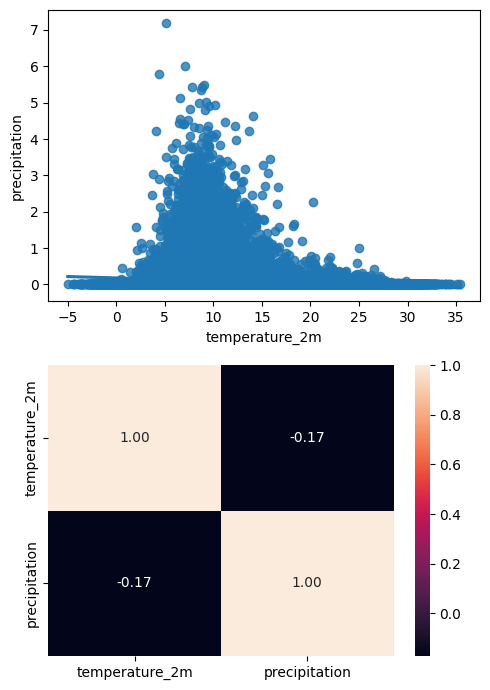

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = df_period, x = "temperature_2m", y = "precipitation")
sns.heatmap(df_period[["temperature_2m", "precipitation"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

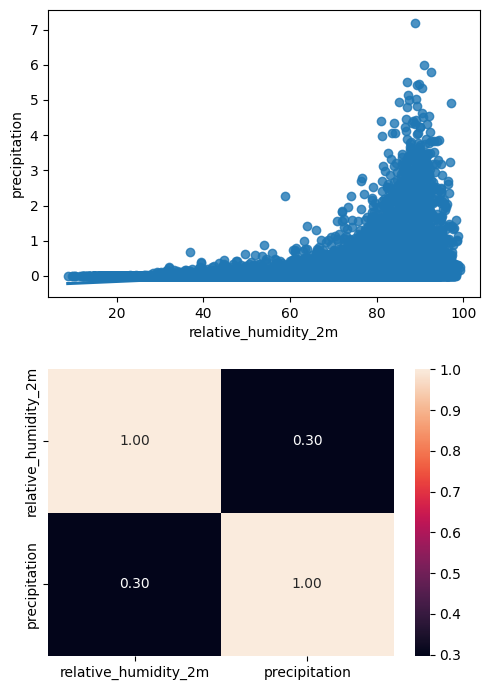

In [ ]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = df_period, x = "relative_humidity_2m", y = "precipitation")
sns.heatmap(df_period[["relative_humidity_2m", "precipitation"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

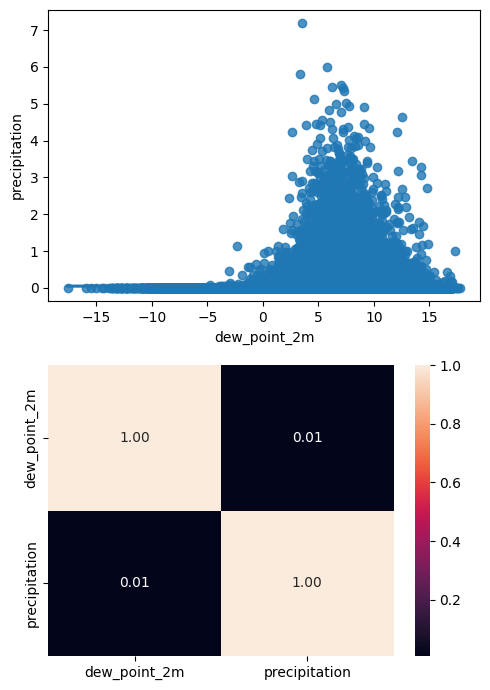

In [ ]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = df_period, x = "dew_point_2m", y = "precipitation")
sns.heatmap(df_period[["dew_point_2m", "precipitation"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

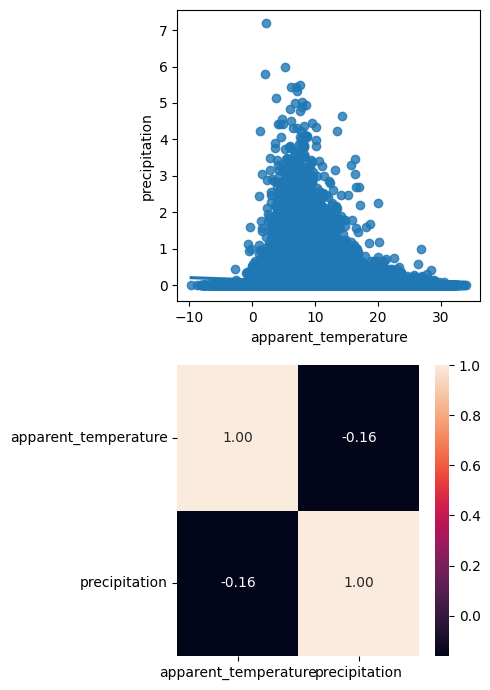

In [ ]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = df_period, x = "apparent_temperature", y = "precipitation")
sns.heatmap(df_period[["apparent_temperature", "precipitation"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

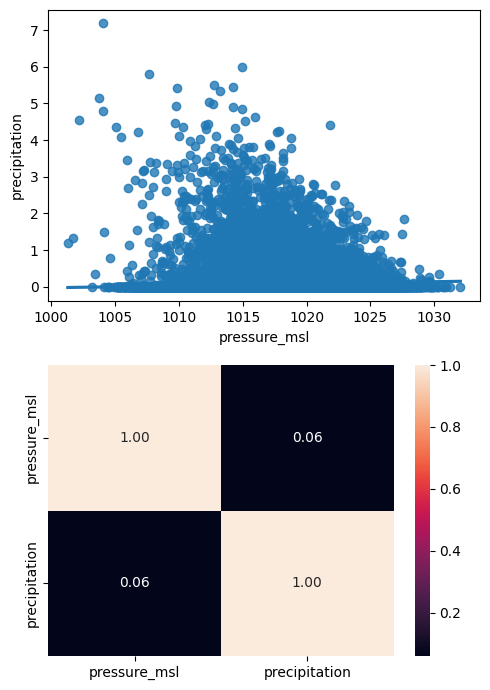

In [ ]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = df_period, x = "pressure_msl", y = "precipitation")
sns.heatmap(daily_dataframe[["pressure_msl", "precipitation"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

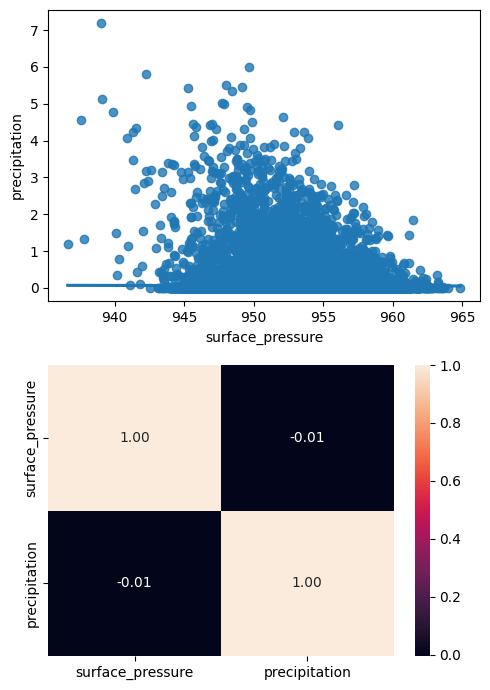

In [ ]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = df_period, x = "surface_pressure", y = "precipitation")
sns.heatmap(df_period[["surface_pressure", "precipitation"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

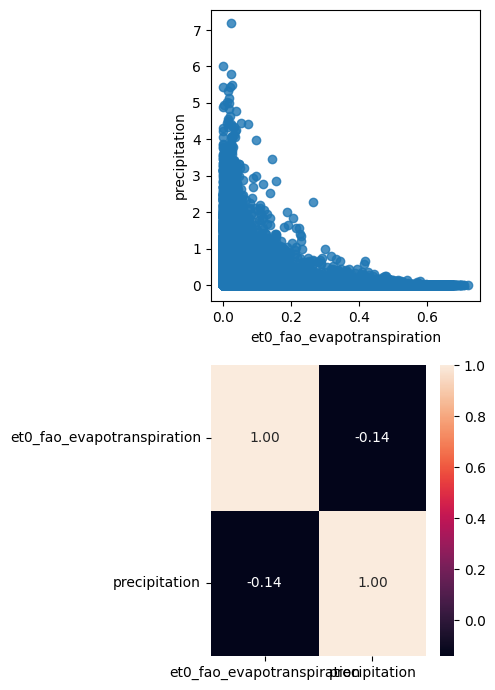

In [ ]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = df_period, x = "et0_fao_evapotranspiration", y = "precipitation")
sns.heatmap(df_period[["et0_fao_evapotranspiration", "precipitation"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

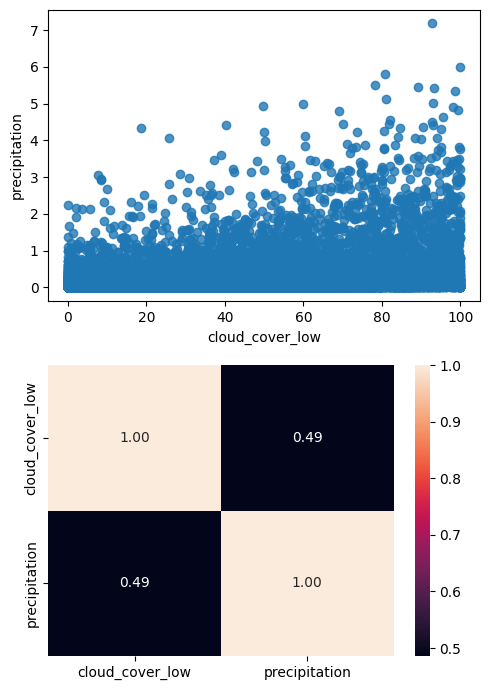

In [ ]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = df_period, x = "cloud_cover_low", y = "precipitation")
sns.heatmap(df_period[["cloud_cover_low", "precipitation"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

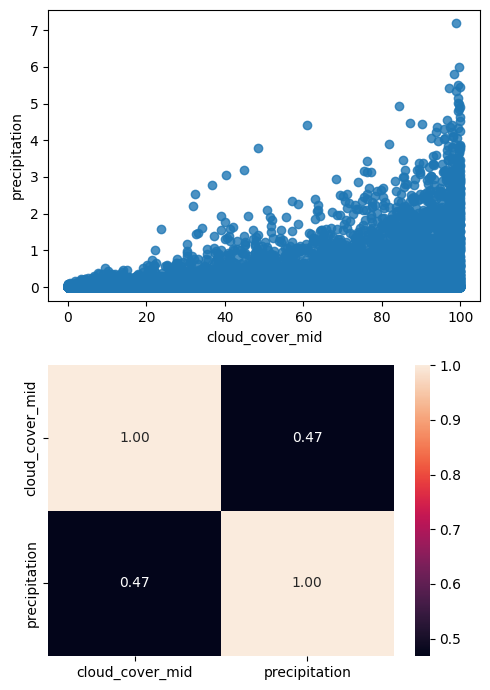

In [ ]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = df_period, x = "cloud_cover_mid", y = "precipitation")
sns.heatmap(df_period[["cloud_cover_mid", "precipitation"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

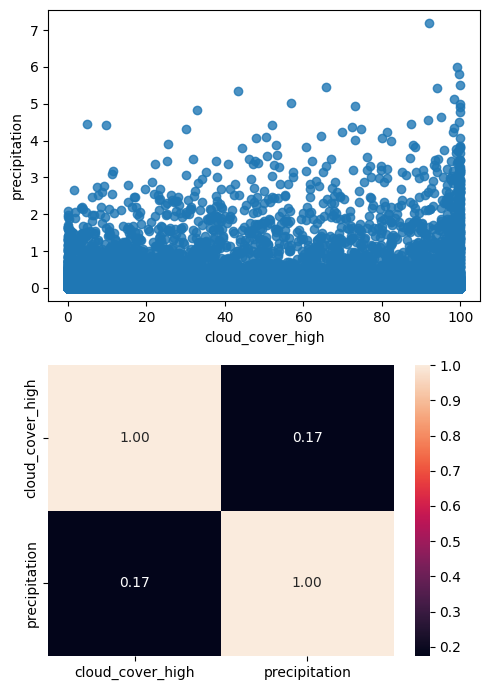

In [ ]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = df_period, x = "cloud_cover_high", y = "precipitation")
sns.heatmap(df_period[["cloud_cover_high", "precipitation"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

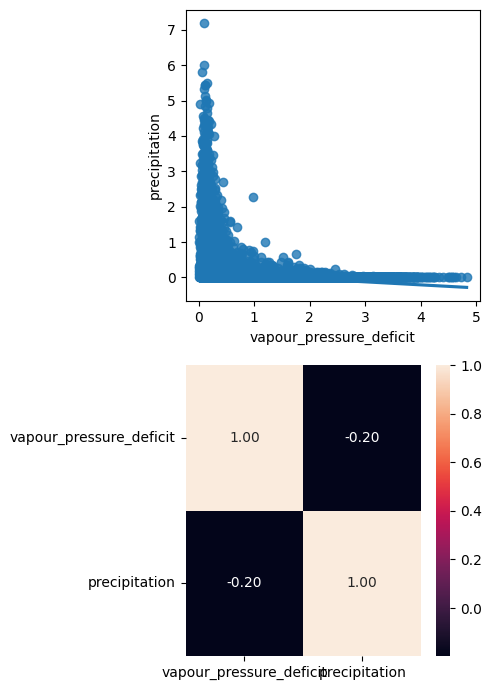

In [ ]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = df_period, x = "vapour_pressure_deficit", y = "precipitation")
sns.heatmap(df_period[["vapour_pressure_deficit", "precipitation"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

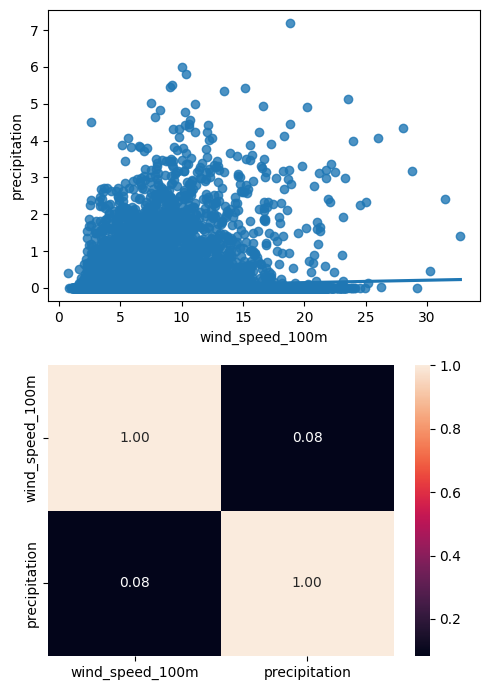

In [ ]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = df_period, x = "wind_speed_100m", y = "precipitation")
sns.heatmap(df_period[["wind_speed_100m", "precipitation"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

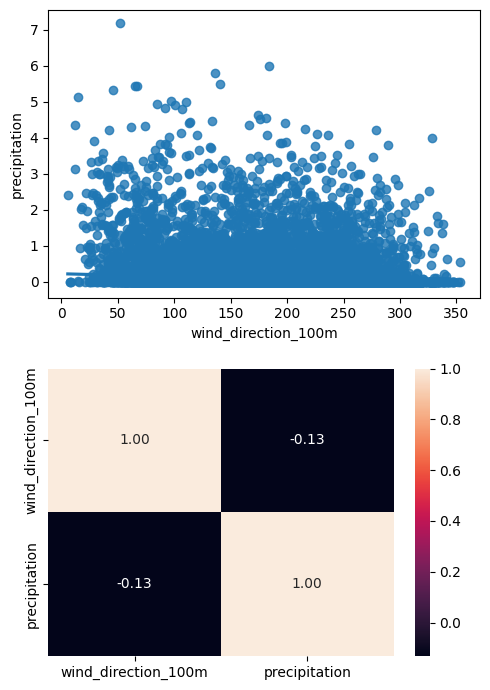

In [ ]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = df_period, x = "wind_direction_100m", y = "precipitation")
sns.heatmap(df_period[["wind_direction_100m", "precipitation"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

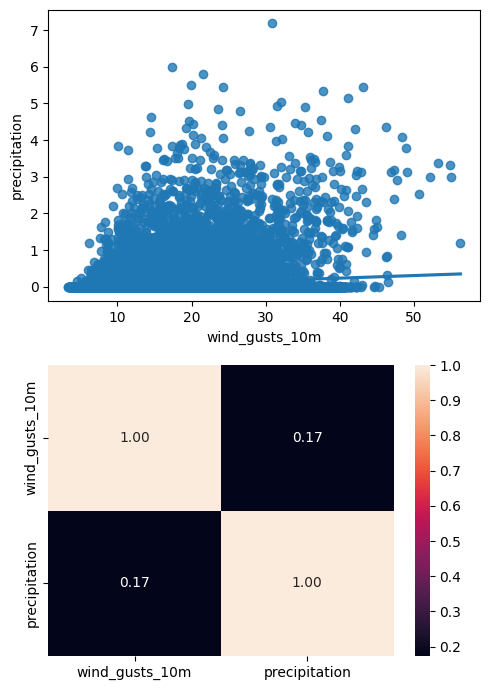

In [ ]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = df_period, x = "wind_gusts_10m", y = "precipitation")
sns.heatmap(df_period[["wind_gusts_10m", "precipitation"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

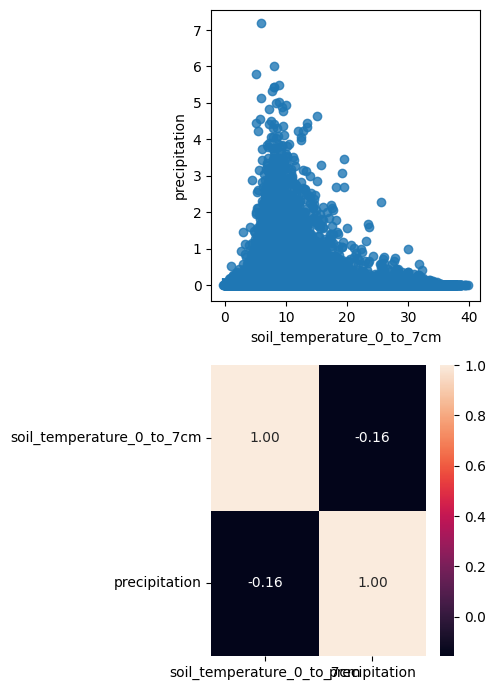

In [ ]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = df_period, x = "soil_temperature_0_to_7cm", y = "precipitation")
sns.heatmap(df_period[["soil_temperature_0_to_7cm", "precipitation"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

KeyboardInterrupt: 

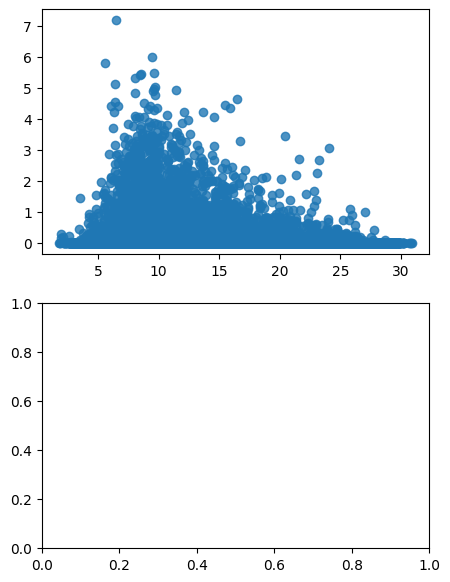

In [ ]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = df_period, x = "soil_temperature_7_to_28cm", y = "precipitation")
sns.heatmap(df_period[["soil_temperature_7_to_28cm", "precipitation"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

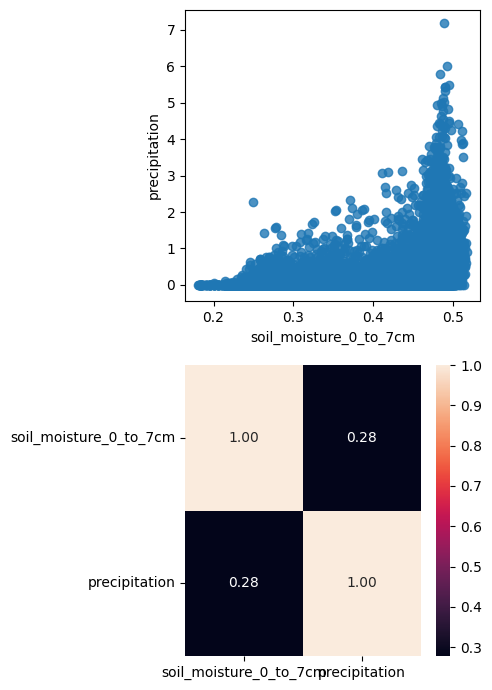

In [ ]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = df_period, x = "soil_moisture_0_to_7cm", y = "precipitation")
sns.heatmap(df_period[["soil_moisture_0_to_7cm", "precipitation"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [ ]:
df_period.drop(["apparent_temperature","rain","snowfall","snow_depth","et0_fao_evapotranspiration","wind_speed_10m","wind_speed_100m","wind_direction_10m","wind_direction_100m","soil_temperature_0_to_7cm","soil_temperature_7_to_28cm","soil_moisture_7_to_28cm"], axis = 1, inplace = True)
df_period.head()

temperature_2m  relative_humidity_2m  dew_point_2m  \
date       period                                                       
1973-01-01 1            18.983332             59.006634     10.650000   
           2            22.106251             42.466049      7.000000   
           3            31.314285             18.152349      4.121428   
1973-01-02 1            21.611111             39.276871      6.827778   
           2            22.881250             38.762501      6.675000   

                   precipitation  pressure_msl  surface_pressure  \
date       period                                                  
1973-01-01 1                 0.0   1012.433350        949.841675   
           2                 0.0   1011.212524        949.310608   
           3                 0.0   1008.857117        948.925232   
1973-01-02 1                 0.0   1010.422180        948.488281   
           2                 0.0   1010.512512        948.807251   

                   cloud_cover_low  cloud_cover_mid  cloud_cover_high  \
date       period                                                       
1973-01-01 1                   0.0              0.0          0.000000   
           2                   0.0              0.0          0.000000   
           3                   0.0              0.0          0.142857   
1973-01-02 1                   0.0              0.0          0.000000   
           2                   0.0              0.0          0.000000   

                   vapour_pressure_deficit  wind_gusts_10m  \
date       period                                            
1973-01-01 1                      0.936806        8.719999   
           2                      1.825995       17.639999   
           3                      3.758467       29.468571   
1973-01-02 1                      1.636947       11.759999   
           2                      2.001676       17.235001   

                   soil_moisture_0_to_7cm  
date       period                          
1973-01-01 1                     0.248000  
           2                     0.247625  
           3                     0.247000  
1973-01-02 1                     0.247000  
           2                     0.247000

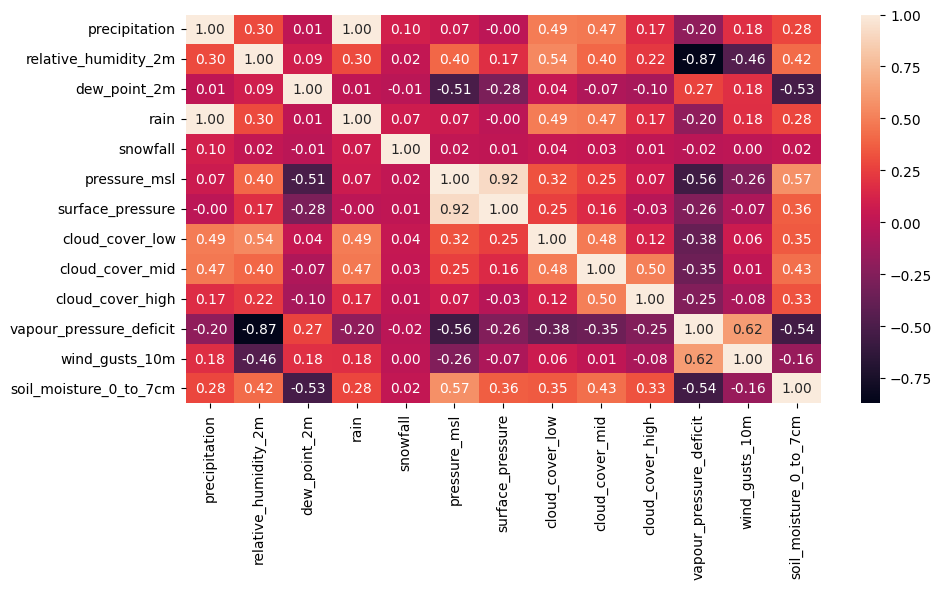

In [ ]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(df_period[['precipitation','relative_humidity_2m' ,	'dew_point_2m' 	 ,	'rain' 	,'snowfall', 	'pressure_msl' ,	'surface_pressure' ,	'cloud_cover_low' ,	'cloud_cover_mid' ,	'cloud_cover_high' ,	'vapour_pressure_deficit',"wind_gusts_10m","soil_moisture_0_to_7cm"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

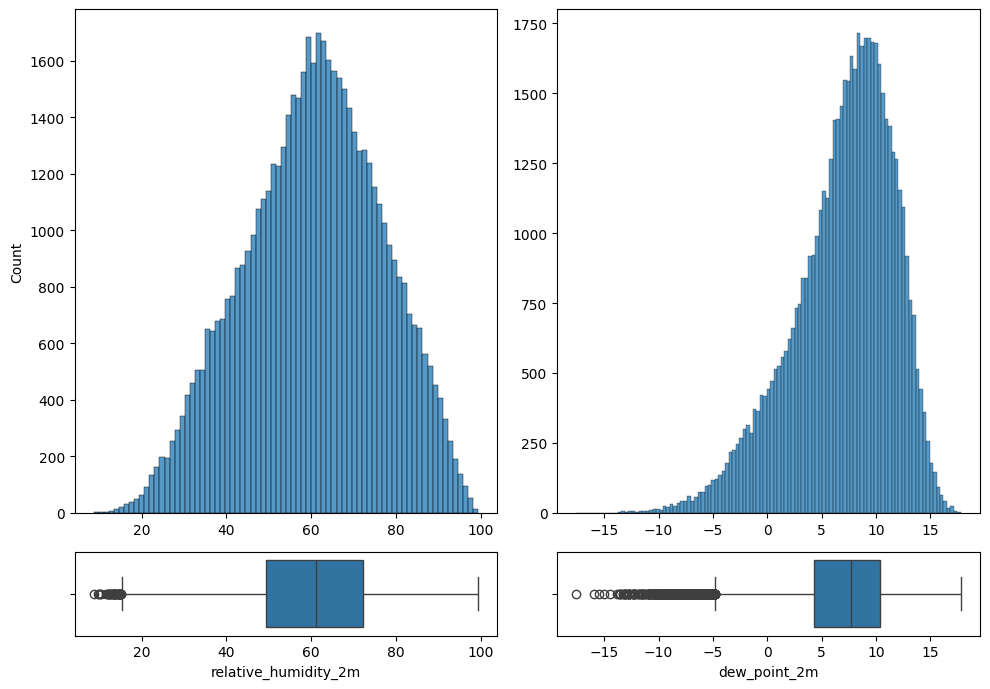

In [ ]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df_period, x = "relative_humidity_2m").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df_period, x = "relative_humidity_2m")
sns.histplot(ax = axis[0, 1], data = df_period, x = "dew_point_2m").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df_period, x = "dew_point_2m")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

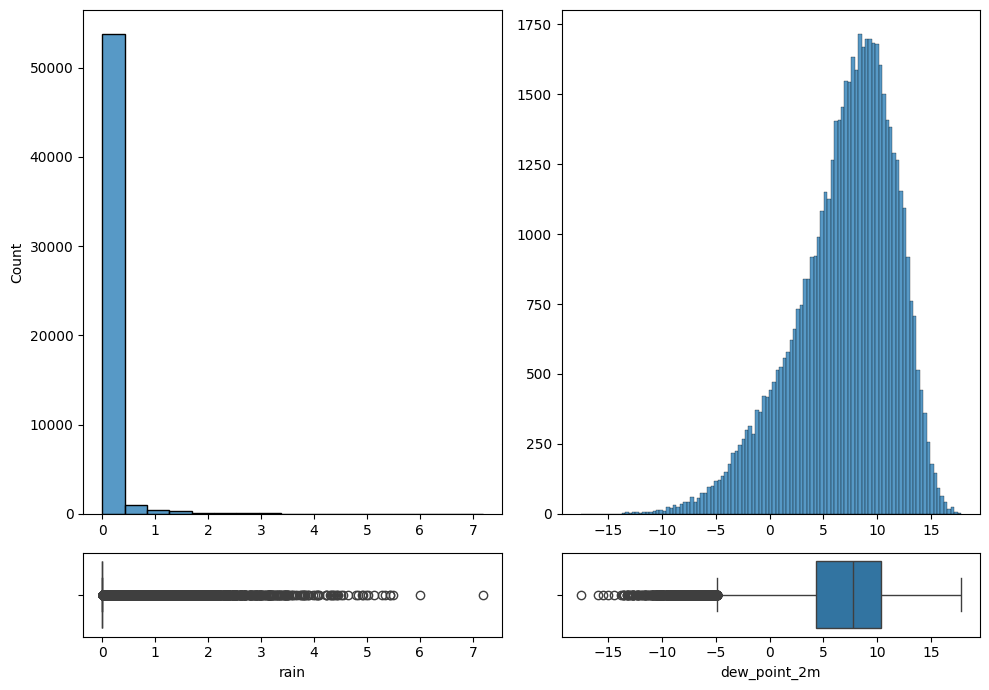

In [ ]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df_period, x = "rain").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df_period, x = "rain")
sns.histplot(ax = axis[0, 1], data = df_period, x = "dew_point_2m").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df_period, x = "dew_point_2m")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

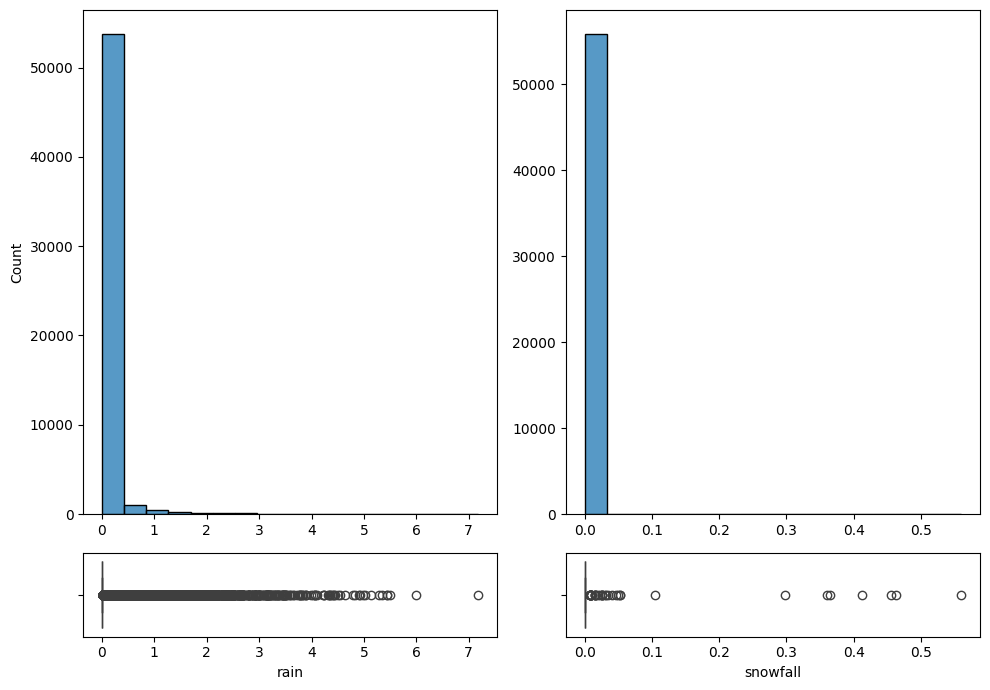

In [ ]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df_period, x = "rain").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df_period, x = "rain")
sns.histplot(ax = axis[0, 1], data = df_period, x = "snowfall").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df_period, x = "snowfall")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

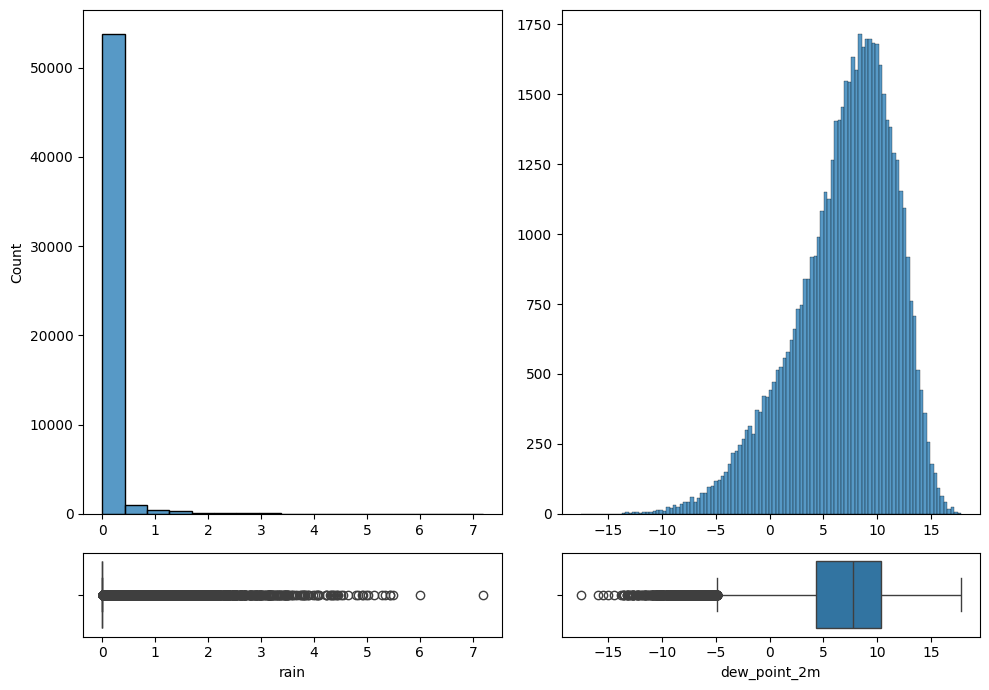

In [ ]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df_period, x = "rain").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df_period, x = "rain")
sns.histplot(ax = axis[0, 1], data = df_period, x = "dew_point_2m").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df_period, x = "dew_point_2m")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

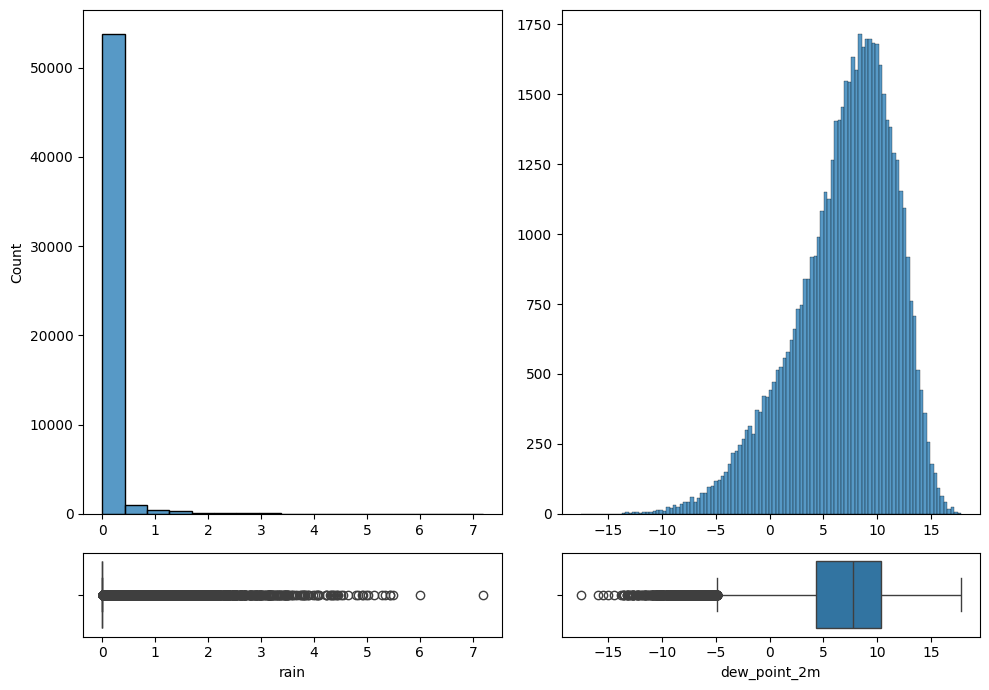

In [ ]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df_period, x = "rain").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df_period, x = "rain")
sns.histplot(ax = axis[0, 1], data = df_period, x = "dew_point_2m").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df_period, x = "dew_point_2m")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [ ]:
df_period.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 56544 entries, (datetime.date(1973, 1, 1), 1) to (datetime.date(2024, 8, 8), 3)
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   temperature_2m           56539 non-null  float32
 1   relative_humidity_2m     56539 non-null  float32
 2   dew_point_2m             56539 non-null  float32
 3   precipitation            56539 non-null  float32
 4   rain                     56539 non-null  float32
 5   snowfall                 56539 non-null  float32
 6   pressure_msl             56539 non-null  float32
 7   surface_pressure         56539 non-null  float32
 8   cloud_cover_low          56539 non-null  float32
 9   cloud_cover_mid          56539 non-null  float32
 10  cloud_cover_high         56539 non-null  float32
 11  vapour_pressure_deficit  56539 non-null  float32
 12  wind_gusts_10m           56539 non-null  float32
 13  soil_moisture_0_to_7cm

In [ ]:
#hago drop a datos nulos
df_period = df_period.dropna()

In [ ]:
df_period.drop(["rain","snowfall"], axis = 1, inplace = True)

https://open-meteo.com/en/docs

In [ ]:
from sklearn.model_selection import train_test_split

X = df_period.drop("precipitation", axis = 1)
y = df_period["precipitation"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,,temperature_2m,relative_humidity_2m,dew_point_2m,pressure_msl,surface_pressure,cloud_cover_low,cloud_cover_mid,cloud_cover_high,vapour_pressure_deficit,wind_gusts_10m,soil_moisture_0_to_7cm
date,period,,,,,,,,,,,
2021-06-11,3,19.279285,36.834347,3.722143,1015.785706,953.047485,0.000000,0.000000,34.714287,1.462995,10.028571,0.305571
1979-06-29,3,11.457143,68.690544,5.742857,1015.928589,951.525513,8.571428,0.571429,5.000000,0.441856,17.948572,0.291000
1991-01-21,2,18.693750,44.038822,5.043750,1015.424988,952.575073,0.000000,0.000000,0.000000,1.373013,13.770000,0.247000
2011-07-27,2,7.943750,32.596920,-8.237500,1015.512512,950.362000,0.000000,0.000000,94.250000,0.717026,8.415000,0.458125
1987-06-27,2,10.287499,63.479897,3.606250,1015.275024,950.656494,14.375000,0.000000,0.000000,0.460841,11.025000,0.378750


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0.        , 0.00071429, 0.        , ..., 0.000375  , 0.        ,
       0.00411508])

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)



0.020590677632094948

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 0.020590677632094948
Coefficient of determination: 0.7649423924668478


In [ ]:
#guardo modelo entrenado
import pickle

pickle.dump(model,open('model.sav','wb'))

In [ ]:
#intento optimizar hiperparametros con random search
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV
import numpy as np

## Optimización

rf_random = {"n_estimators": np.arange(100,400, 100),
           "max_depth": [5,10,15],
           "min_samples_split": np.arange(5,20, 5),
           "min_samples_leaf": np.arange(5, 20, 5),
           "max_features": [1,5,10]}

### RandomizedSearchCV

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_random,
                              scoring    = "neg_root_mean_squared_error",
                              n_iter= 20,
                              cv=5,
                              verbose=True)

## Entrenamiento
rs_model.fit(X_train, y_train)

rs_model.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 5,
 'max_depth': 15}

In [ ]:
rs_model_best = RandomForestRegressor(n_estimators = 300,
                                       min_samples_split = 5,
                                       min_samples_leaf = 5,
                                       max_features = 5,
                                       max_depth = 15)
rs_model_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, max_features=5, min_samples_leaf=5,
                      min_samples_split=5, n_estimators=300)

In [ ]:
y_pred_rs = rs_model_best.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred_rs)}")
print(f"Raíz del Error cuadrático medio: {np.sqrt(mean_squared_error(y_test, y_pred_rs))}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred_rs)}")

Error cuadrático medio: 0.021067547910235546
Raíz del Error cuadrático medio: 0.145146642779761
Coeficiente de determinación: 0.759498570331112


In [ ]:
from xgboost import XGBRegressor

model_XGB = XGBRegressor(random_state = 42,n_estimators=100, )
model_XGB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_XGB = model_XGB.predict(X_test)
y_pred_XGB

array([ 6.6591907e-05,  2.4270650e-03, -8.9775660e-04, ...,
       -6.4072444e-04,  1.2577781e-05, -1.0012502e-02], dtype=float32)

In [ ]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred_XGB)}")
print(f"Raíz del Error cuadrático medio: {np.sqrt(mean_squared_error(y_test, y_pred_XGB))}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred_XGB)}")

Error cuadrático medio: 0.022303784266114235
Raíz del Error cuadrático medio: 0.1493445187807083
Coeficiente de determinación: 0.7453860356931806


In [ ]:
import joblib
joblib.dump(model, 'random_forest_model.pkl', compress=3)

['random_forest_model.pkl']